# Содержание

[1 Анализ и изучение общей информации](#1)

- [1.1 Вывод](#11)

[2 Предобработка данных](#2)

- [2.1 Предобработка и замена типов данных](#21)

- [2.2 Подсчет предоставленных услуг пользователям по месяцам](#22)

- [2.3 Помесячная выручка с каждого пользователя](#23)

- [2.4 Вывод](#24)

[3 Анализ данных](#3)

- [3.1 Вывод](#31)

[4 Проверка гипотез](#4)

- [4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#41)

- [4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#42)

[5 Общий вывод](#5)


# Определение перспективного тарифа для телеком-компании

Cделать предварительный анализ тарифов «Смарт» и «Ультра» на небольшой выборке клиентов компании «Мегалайн» — федерального оператора сотовой связи. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Чтобы скорректировать рекламный бюджет и понять какой тариф приносит больше денег нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<a id='1'></a>
## Анализ и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
from scipy import stats as st

df_calls = pd.read_csv("/datasets/calls.csv")
df_internet = pd.read_csv("/datasets/internet.csv", index_col=0)
df_messages = pd.read_csv("/datasets/messages.csv")
df_tariffs = pd.read_csv("/datasets/tariffs.csv")
df_users = pd.read_csv("/datasets/users.csv")

In [2]:
df_list = [df_users, df_calls, df_messages, df_internet, df_tariffs]
for i in df_list:
  display(i.head())
  i.info()
  display(i.isna().sum())
  print("duplicated", i.duplicated().sum())
  display(i.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

duplicated 0


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

duplicated 0


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

duplicated 0


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

duplicated 0


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

duplicated 0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<a id='11'></a>
### Вывод
В целом предоставленные данные хорошего качества, пропущенные значения имеются только в одной колонке churn_date, они логичны и замене не подлежат. Дупликатов не обнаружено. Лишним выглядет колонка 'Unnamed: 0' в таблице df_internet, которая дублирует индексацию. Так же стоит перевести некоторые колонки, характеризующие траффик определенного вида связи в целочисленный тип с округление в верхнюю сторону. В дальнейшем, для анализа потребуется объеденить данные в одну общую таблицу по уникальному значению user_id.


<a id='2'></a>
## Предобработка данных

<a id='21'></a>
###  Предобработка и замена типов данных

Для каждой таблицы проведем намеченные в выводе предыдущего раздела обработку, а так же создадим для них столбцы с номером месяца
, в рамках которого предоставлялись услуги.

In [3]:
#df_internet = df_internet.drop('Unnamed: 0',axis=1)
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"])
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"])
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])
df_internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [4]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
df_calls['duration']=df_calls['duration'].apply(math.ceil)
df_messages['month']=df_messages['message_date'].astype('datetime64[M]').dt.month
df_internet['month']=df_internet['session_date'].astype('datetime64[M]').dt.month
df_calls["month"] = df_calls['call_date'].astype('datetime64[M]').dt.month

In [6]:
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


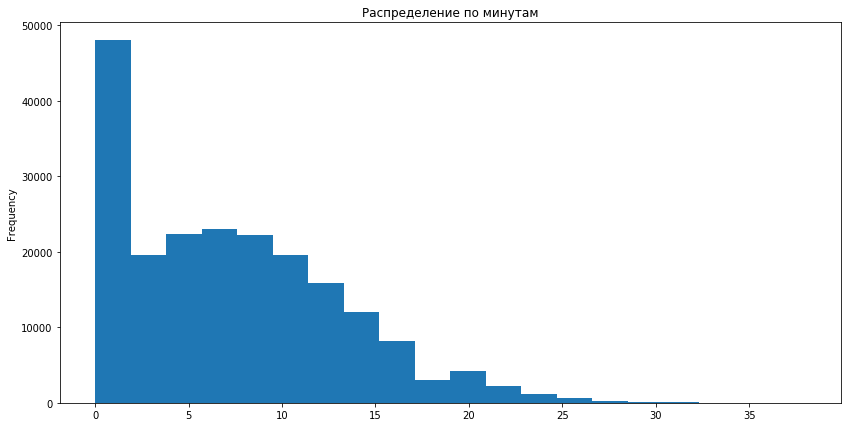

In [7]:

df_calls["duration"].plot(kind="hist", bins=20, figsize=(14,7), title="Распределение по минутам");

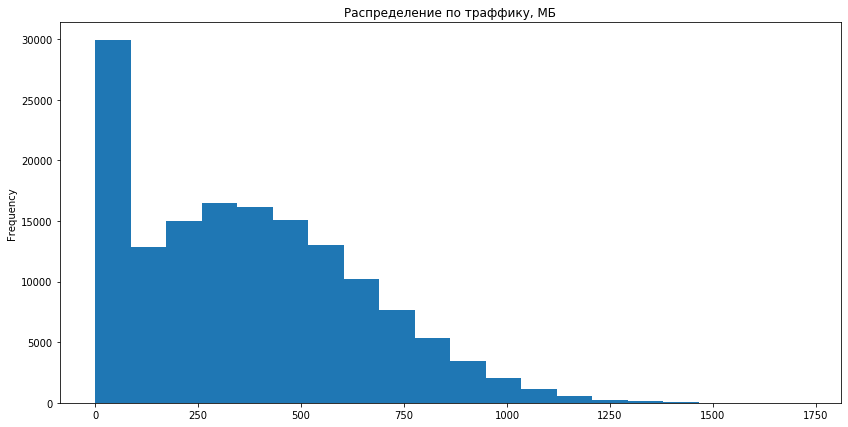

In [8]:
df_internet["mb_used"].plot(kind="hist", bins=20, figsize=(14,7), title="Распределение по траффику, МБ");

<a id='22'></a>
### Подсчет предоставленных услуг пользователям по месяцам

Создадим сводные таблицы траффика связи для каждого пользователя по месяцам. 

количество сделанных звонков (calls_count) и израсходованных минут (calls_sum) разговора по месяцам:

In [9]:
calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_pivot.columns = ['user_id','month','calls_count', 'calls_sum']
calls_pivot

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


количество отправленных сообщений по месяцам:

In [10]:
messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_pivot = messages_pivot.rename(columns={"id" : "message_count"})
messages_pivot

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


объем израсходованного интернет-трафика по месяцам:

In [11]:
internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_pivot["gb_used"] = (internet_pivot["mb_used"] / 1024).apply(math.ceil)
internet_pivot

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


Для удобства объеденим сводные таблицы с услугами связи и таблицу с информацией о пользователях df_users в общую таблицу df.

In [12]:
df = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer').merge(internet_pivot, on=['user_id', 'month'], how='outer')

In [13]:
df["calls_count"] = df["calls_count"].astype("Int64")
df["calls_sum"] = df["calls_sum"].astype("Int64")
df["message_count"] = df["message_count"].astype("Int64")
df["gb_used"] = df["gb_used"].astype("Int64")

In [14]:
df

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used
0,1000,5,22,159,22,2253.49,3
1,1000,6,43,172,60,23233.77,23
2,1000,7,47,340,75,14003.64,14
3,1000,8,52,408,81,14055.93,14
4,1000,9,58,466,57,14568.91,15
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32,17206.30,17
3210,1489,10,NaN,NaN,21,19559.44,20
3211,1489,11,NaN,NaN,20,17491.56,18
3212,1489,12,NaN,NaN,35,17322.51,17


In [15]:
df.isnull().sum()

user_id            0
month              0
calls_count       40
calls_sum         40
message_count    497
mb_used           11
gb_used           11
dtype: int64

In [16]:
# общая таблица с информацией по каждому пользователю по месяцам
df = df_users.merge(df, on='user_id', how='outer')
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_used,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22,159,22,2253.49,3
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43,172,60,23233.77,23
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47,340,75,14003.64,14
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52,408,81,14055.93,14
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58,466,57,14568.91,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41,247,42,20579.36,21
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9,70,11,1845.75,2
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68,449,48,17788.51,18
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74,612,59,17963.31,18


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
user_id          3216 non-null int64
age              3216 non-null int64
churn_date       189 non-null datetime64[ns]
city             3216 non-null object
first_name       3216 non-null object
last_name        3216 non-null object
reg_date         3216 non-null datetime64[ns]
tariff           3216 non-null object
month            3214 non-null float64
calls_count      3174 non-null Int64
calls_sum        3174 non-null Int64
message_count    2717 non-null Int64
mb_used          3203 non-null float64
gb_used          3203 non-null Int64
dtypes: Int64(4), datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 389.4+ KB


In [18]:
df["month"] = df["month"].astype("Int64")
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_used,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,2253.49,3
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23233.77,23
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14003.64,14
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14055.93,14
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,14568.91,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41,247,42,20579.36,21
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,70,11,1845.75,2
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68,449,48,17788.51,18
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74,612,59,17963.31,18


<a id='23'></a>
### Помесячная выручка с каждого пользователя


In [19]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
#Напишем функцию для подсчета выручки

def ft_income(data):
    smart_gb_limit = 15
    smart_messages_limit = 50
    smart_minutes_limit = 500
    smart_price_month = 550
    smart_price_gb = 200
    smart_price_message = 3
    smart_price_minute = 3
    ultra_gb_limit = 30
    ultra_messages_limit = 1000
    ultra_minutes_limit = 3000
    ultra_price_month = 1950
    ultra_price_gb = 150
    ultra_price_message = 1
    ultra_price_minute = 1
    
    if data['tariff'] == 'smart':
        total_rubls = smart_price_month
        if data["calls_sum"] > smart_minutes_limit:
            total_rubls += (data["calls_sum"] - smart_minutes_limit) * smart_price_minute
        if data['message_count'] > smart_messages_limit:
            total_rubls += (data['message_count'] - smart_messages_limit) * smart_price_message
        if data['gb_used'] > smart_gb_limit:
            total_rubls += (data["gb_used"] - smart_gb_limit) * smart_price_gb
        return total_rubls
    else:
        total_rubls = ultra_price_month
        if data["calls_sum"] > ultra_minutes_limit:
            total_rubls += (data["calls_sum"] - ultra_minutes_limit) * ultra_price_minute
        if data['message_count'] > ultra_messages_limit:
            total_rubls += (data['message_count'] - ultra_messages_limit) * ultra_price_message
        if data['gb_used'] > ultra_gb_limit:
            total_rubls += (data["gb_used"] - ultra_gb_limit) * ultra_price_gb
        return total_rubls
    
#применяем функцию для подсчета выручки и добавляем ее в новую колонку income 
df['income'] = df.apply(ft_income, axis=1)
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_used,gb_used,income
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,2253.49,3,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23233.77,23,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14003.64,14,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14055.93,14,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,14568.91,15,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41,247,42,20579.36,21,1750
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,70,11,1845.75,2,550
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68,449,48,17788.51,18,1150
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74,612,59,17963.31,18,1513


<a id='24'></a>
### Вывод
Провели необходимую предобработку данных с привидением значений к нужным типам. Собрали в общую таблицу df все данные, а так же посчитали для каждого пользователя помесячно предоставленные услуги:

- количество сделанных звонков и израсходованных минут разговора
- количество отправленных сообщений
- объем израсходованного интернет-трафика

Посчитали выручку с каждого пользователя помесячно.

<a id='3'></a>
## Анализ данных

Подсчет минут разговора, колличества сообщений и объём интернет-трафика пользователей каждого тарифа в месяц.

In [21]:
smart_pivot = df[df['tariff']=='smart'].pivot_table(index='month', values=['calls_sum','message_count','gb_used','income'], aggfunc='sum').reset_index()
ultra_pivot = df[df['tariff']=='ultra'].pivot_table(index='month', values=['calls_sum','message_count','gb_used','income'], aggfunc='sum').reset_index()
smart_pivot

,month,calls_sum,gb_used,income,message_count
0,1,6931,297,24525,620
1,2,17324,687,48001,1397
2,3,30034,1173,89676,2453
3,4,41119,1526,107866,3443
4,5,54618,2243,168849,4762
5,6,64885,2616,197459,5478
6,7,82079,3191,246014,6784
7,8,99045,3933,310340,7905
8,9,111439,4262,324986,8746
9,10,125284,4963,401267,9927


In [22]:
ultra_pivot

,month,calls_sum,gb_used,income,message_count
0,1,3853,119,17550,304
1,2,7131,288,47400,527
2,3,18117,653,74550,1195
3,4,25191,933,110100,1736
4,5,34192,1298,138000,2536
5,6,40295,1591,171300,3505
6,7,49667,1866,192750,4536
7,8,54653,2097,222900,5183
8,9,62036,2213,232800,6013
9,10,68644,2468,254100,7187


Опишем характеристику пользователя каждого тарифа.

In [23]:
df[df['tariff']=='smart'].describe()

,user_id,age,month,calls_count,calls_sum,message_count,mb_used,gb_used,income
count,2230.000000,2230.000000,2229.000000,2223.000000,2223.000000,1922.000000,2228.000000,2228.000000,2230.000000
mean,1246.562332,46.557848,8.346792,58.621233,419.062978,38.716441,16215.661849,16.336176,1289.641704
std,146.110501,16.349865,2.920316,25.796101,189.325618,26.787949,5861.736234,5.737923,818.370799
min,1001.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,550.000000
25%,1121.000000,32.000000,6.000000,40.000000,285.000000,17.000000,12649.272500,13.000000,550.000000
50%,1240.000000,47.000000,9.000000,60.000000,423.000000,34.000000,16507.740000,17.000000,1021.000000
75%,1376.000000,62.000000,11.000000,76.000000,545.500000,55.000000,20043.792500,20.000000,1750.000000
max,1499.000000,75.000000,12.000000,198.000000,1435.000000,143.000000,38552.450000,38.000000,6770.000000


In [24]:
df[df['tariff']=='ultra'].describe()

,user_id,age,month,calls_count,calls_sum,message_count,mb_used,gb_used,income
count,986.000000,986.000000,985.000000,951.000000,951.000000,795.000000,975.000000,975.000000,986.000000
mean,1262.957404,46.838742,8.250761,76.016824,545.451104,61.161006,19668.485262,19.694359,2070.030426
std,140.689268,17.099807,2.871762,42.403348,306.925754,45.931026,9943.050284,9.702924,376.015578
min,1000.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1950.000000
25%,1143.000000,30.000000,6.000000,43.000000,310.000000,24.000000,12008.305000,12.000000,1950.000000
50%,1277.000000,45.000000,9.000000,75.000000,528.000000,51.000000,19394.290000,19.000000,1950.000000
75%,1381.000000,63.000000,11.000000,105.000000,756.500000,87.500000,26896.550000,27.000000,1950.000000
max,1495.000000,75.000000,12.000000,244.000000,1673.000000,224.000000,49745.690000,49.000000,4800.000000


Посчитаем среднее количество, дисперсию и стандартное отклонение показателей, характеризующих пользователей каждого тарифа.

In [25]:
for i in ["calls_sum", "message_count", "gb_used", "income"]:
    print()
    print(i)
    print()
    print("средняя")
    print("smart: {:.2f}".format(df[df['tariff']=='smart'][i].mean()))
    print("ultra: {:.2f}".format(df[df['tariff']=='ultra'][i].mean()))
    print("дисперсия")
    print("smart: {:.2f}".format(np.var(df[df['tariff']=='smart'][i], ddof=1)))
    print("ultra: {:.2f}".format(np.var(df[df['tariff']=='ultra'][i], ddof=1)))
    print("стандартное отклонение")
    print("smart: {:.2f}".format(math.sqrt(np.var(df[df['tariff']=="smart"][i], ddof=1))))
    print("ultra: {:.2f}".format(math.sqrt(np.var(df[df['tariff']=='ultra'][i], ddof=1))))
  


calls_sum

средняя
smart: 419.06
ultra: 545.45
дисперсия
smart: 35844.19
ultra: 94203.42
стандартное отклонение
smart: 189.33
ultra: 306.93

message_count

средняя
smart: 38.72
ultra: 61.16
дисперсия
smart: 717.59
ultra: 2109.66
стандартное отклонение
smart: 26.79
ultra: 45.93

gb_used

средняя
smart: 16.34
ultra: 19.69
дисперсия
smart: 32.92
ultra: 94.15
стандартное отклонение
smart: 5.74
ultra: 9.70

income

средняя
smart: 1289.64
ultra: 2070.03
дисперсия
smart: 669730.76
ultra: 141387.71
стандартное отклонение
smart: 818.37
ultra: 376.02


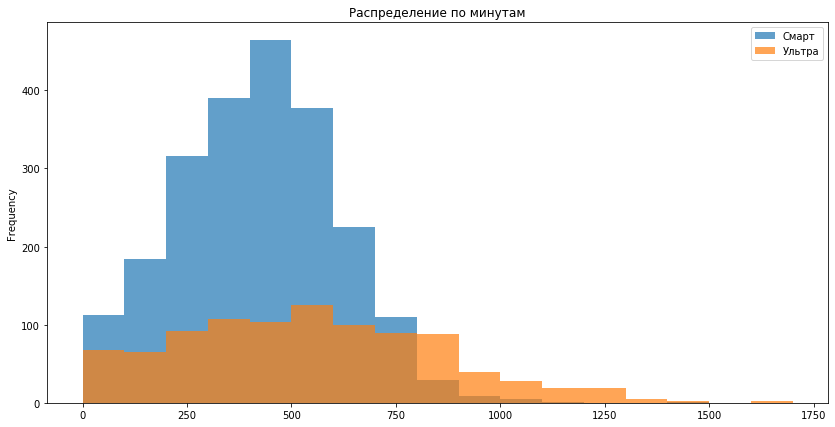

In [26]:
df[df['tariff']=='smart']['calls_sum'].plot(kind="hist", bins=17, alpha=0.7, label="Смарт", legend="q", range = (0, 1700), figsize=(14,7), title="Распределение по минутам");
df[df['tariff']=='ultra']['calls_sum'].plot(kind="hist", bins=17, alpha=0.7, label="Ультра",legend="q", range = (0, 1700), figsize=(14,7));

Для тарифа смарт харктерно нормальное распределение с пиком в 500 минут, что объяснимо лимитом без доп. платы включенным в тариф.
Пользователям тарифа ультра характерно более равномерное распределение, никто из них не разговаривал больше предоставленного лимита в 3000 мин. 

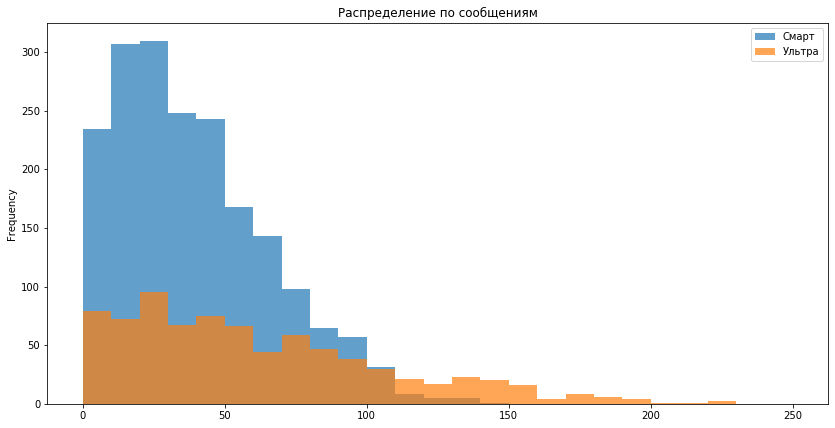

In [27]:
df[df['tariff']=='smart']['message_count'].plot(kind="hist", bins=25, alpha=0.7, label="Смарт", legend="q", range = (0, 250), figsize=(14,7), title="Распределение по сообщениям");
df[df['tariff']=='ultra']['message_count'].plot(kind="hist", bins=25, alpha=0.7, label="Ультра",legend="q", range = (0, 250), figsize=(14,7));

При лимите для тарифа смарт в 50 бесплатных сообщений пик их распределения призодится на 30. Пользователи обоих тарифов редко отправляют более 100 сообщений.

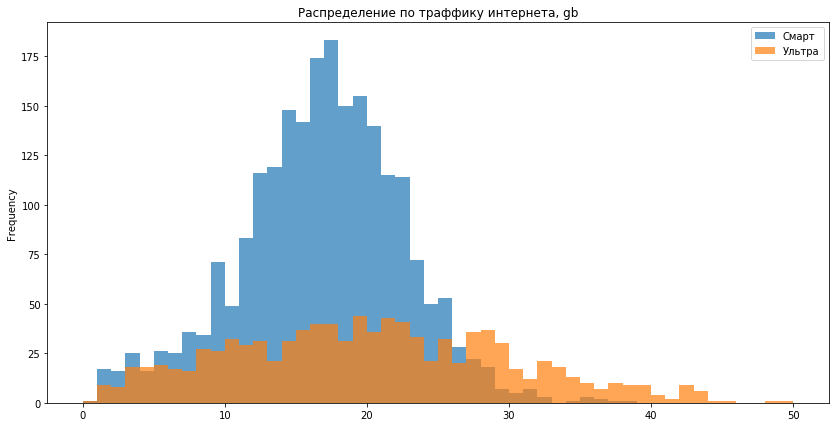

In [28]:
df[df['tariff']=='smart']['gb_used'].plot(kind="hist", bins=50, alpha=0.7, label="Смарт", legend="q", range = (0, 50), figsize=(14,7), title="Распределение по траффику интернета, gb");
df[df['tariff']=='ultra']['gb_used'].plot(kind="hist", bins=50, alpha=0.7, label="Ультра",legend="q", range = (0, 50), figsize=(14,7));

Для тарифа смарт харктерно нормальное распределение. При лимите для тарифа смарт в 15 бесплатных ГБ пик их распределения превышает его и составляет примерно 17 ГБ. Пользователям тарифа ультра характерно более равномерное распределение, лишь малая часть использовало услугу больше предоставленного лимита в 30 ГБ.

Дополнительно проанализируем выручку по тарифам.

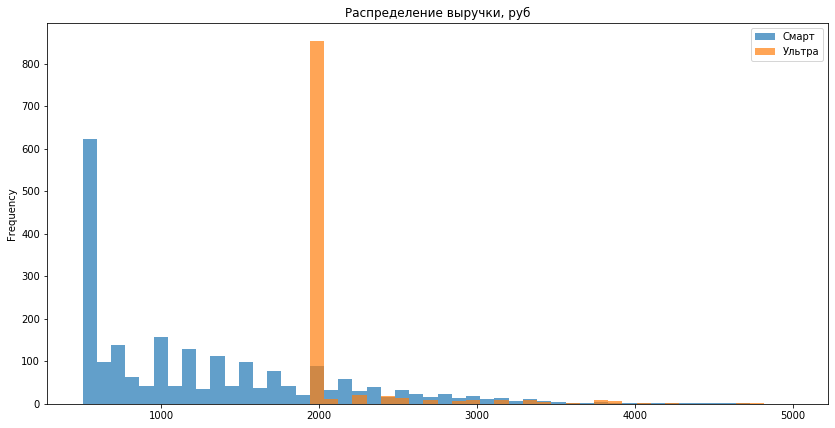

In [29]:
df[df['tariff']=='smart']['income'].plot(kind="hist", bins=50, alpha=0.7, label="Смарт", legend="q", range = (500, 5000), figsize=(14,7), title="Распределение выручки, руб");
df[df['tariff']=='ultra']['income'].plot(kind="hist", bins=50, alpha=0.7, label="Ультра",legend="q", range = (500, 5000), figsize=(14,7));

Пик распределения приходится на суммы ежемесячной абонентской платы: смарт - 550 руб, ультра - 1950 руб.

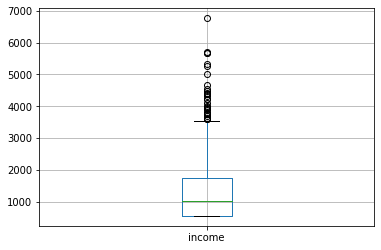

In [30]:
df[df['tariff']=='smart'].boxplot('income');

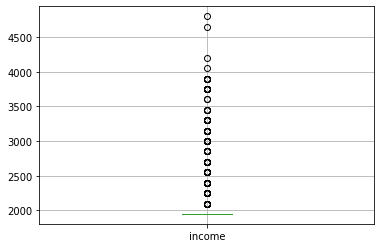

In [31]:
df[df['tariff']=='ultra'].boxplot('income')

<a id='31'></a>
### Вывод
Средняя месячная выручка от пользователей тарифа ультра на 800 рублей больше, но они не превышают установленные в рамках тарифа лимиты на звонки и сообщения и лишь немногие превышают использование интернета, из чего следует что выручка от них редко будет превышать 1950 рублей. 
Пользователи тарифа смарт при абонентской плате в 550 рублей, зачастую превышают установленный лимит, средняя выручка их пользователя составляет 1290 рублей.

<a id='4'></a>
## Проверка гипотез

<a id='41'></a>
### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [32]:
ultra = df[df['tariff']=='ultra']['income']
smart = df[df['tariff']=='smart']['income']
results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Применив t-тест при критическом уровене статистической значимости в 0.05, приходим к выводу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

<a id='42'></a>
### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [33]:
moscow = df[df['city']=='Москва']['income']
other = df[df['city']!='Москва']['income']
results = st.ttest_ind(moscow, other, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Применив t-тест при критическом уровене статистической значимости в 0.05, приходим к выводу, что средняя выручка пользователей Москвы и других регионов не отличается.

<a id='5'></a>
## Общий вывод

На этапе предобработки данных удалили лишние столбцы, привели типы данных к более удобным целочисленным с их округлением согласно т.з. и объединили всю информацию в одну общую таблицу.

Посчитали для каждого пользователя помесячно:
- количество сделанных звонков и израсходованных минут разговора
- количество отправленных сообщений
- объем израсходованного интернет-трафика
- выручку

Посчитали среднее количество, дисперсию и стандартное отклонение, а также проанализировли их распределение путем составления гистограм вышеперечисленных параметров.

При абонетской плате в 1950 рублей, пользователи тарифа ультра редко превышают установленные в рамках тарифа лимиты, тогда как пользователи тарифа смарт при абонентской плате в 550 рублей, зачастую превышают установленный лимит, средняя выручка их пользователя составляет 1290 рублей. 

Гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт» подтвердилась, а средняя выручка пользователей Москвы и других регионов не отличается.

Учитывая, что средняя месячная выручка от пользователей тарифа ультра на 800 рублей больше, именно он приносит больше денег с пользователя.



